## Time resampling

- 시간 기준으로 데이터 Aggregation

- Groupby와 유사
  - 훨씬 간단하고 다양한 기능 제공

In [2]:
import pandas as pd
import os

In [9]:
DATA_DIR = "../datas"
TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")

In [52]:
df = pd.read_csv(TRAIN_PATH, parse_dates=['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [53]:
# 처음부터 datetime 으로 변경
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [54]:
df.head(2).T

,0,1
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00
season,1,1
holiday,0,0
workingday,0,0
weather,1,1
temp,9.84,9.02
atemp,14.395,13.635
humidity,81,80
windspeed,0.0,0.0
casual,3,8


## 월별 자전거 수요량

In [18]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [56]:
df = df.set_index('datetime')

In [57]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [61]:
df['month'] = df.index.month
df['year'] = df.index.year

In [62]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011


### 연도별, 월별 자전거 대여량 (count)

In [79]:
df.groupby(['year', 'month'])['count'].sum().reset_index()

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713
5,2011,6,89776
6,2011,7,92848
7,2011,8,83296
8,2011,9,79104
9,2011,10,79522


## Resampling

- 쿼터별로 잘라야 할 때는?
- 월화수목금토?
- groupby로 하기 어려운 것 가능
- resampling을 사용할 때는 groupby를 시켜줄 필요가 없음
- 하지만 index가 datetime 형식이어야 함

- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html 에서 확인 가능

### 분기별로 count(자전거 대여 횟수)의 합을 보고 싶은 경우

- resample('Q') = 분기별
- resample('M') = 월별
- resample('D') = 일별
- resample('W') = 주별

In [81]:
df['count'].resample('Q').sum()

datetime
2011-03-31     95131
2011-06-30    220006
2011-09-30    255248
2011-12-31    211594
2012-03-31    217367
2012-06-30    368276
2012-09-30    385414
2012-12-31    332440
Freq: Q-DEC, Name: count, dtype: int64

<Axes: xlabel='datetime'>

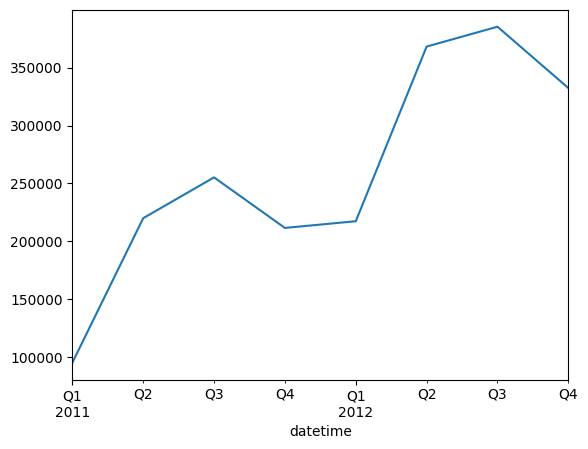

In [82]:
df['count'].resample('Q').sum().plot()

## Resampling - Filter

- something_range 함수로 기간 생성 : Filter 지정
- start, end, frequency 지정

#### period에 날짜 범위 지정, ferq는 '월'로 지정

In [91]:
period = pd.date_range(start = '2011-01-01', end= '2012-03-30', freq='M')

#### 2011년 1월부터 2012년 3월까지 매달마다 period 만큼 뽑기

In [93]:
df['count'].resample('M').sum()[period]

2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
2012-01-31    56332
2012-02-29    66269
Freq: M, Name: count, dtype: int64

#### periods=6으로 설정해서 1달에 1개씩 총 6개의 데이터 뽑기

In [98]:
period = pd.date_range(start = '2011-01-01', periods=6 , freq='M')
df['count'].resample('M').sum()[period]

2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
Freq: M, Name: count, dtype: int64

#### periods=6으로 설정해서 하루에 1개씩 총 6개의 데이터 뽑기

In [99]:
period = pd.date_range(start = '2011-01-01', periods=6 , freq='D')
df['count'].resample('D').sum()[period]

2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
2011-01-06    1606
Freq: D, Name: count, dtype: int64

#### 날짜 직접 지정해주고, 1일 기준으로 데이터 뽑기

In [102]:
df['count'].resample('D').sum()['2011-01-01' : "2012-05-01"]

datetime
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-04-27       0
2012-04-28       0
2012-04-29       0
2012-04-30       0
2012-05-01    5740
Freq: D, Name: count, Length: 487, dtype: int64

<Axes: xlabel='datetime'>

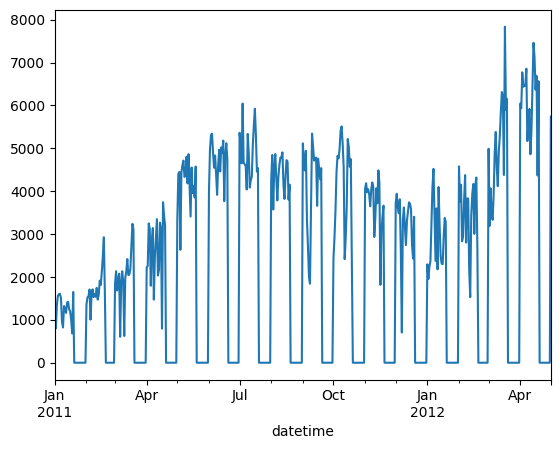

In [103]:
df['count'].resample('D').sum()['2011-01-01' : "2012-05-01"].plot()

### 요일별 자전거 수요량의 평균

In [104]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011


In [123]:
df['dayofweek'] = df.index.dayofweek

In [124]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,dayofweek
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,5


#### 요일별 자전거 대여량 (groupby 사용)

In [127]:
df.groupby(['dayofweek'])['count'].mean()

dayofweek
0    190.390716
1    189.723847
2    188.411348
3    197.296201
4    197.844343
5    196.665404
6    180.839772
Name: count, dtype: float64

<Axes: xlabel='dayofweek'>

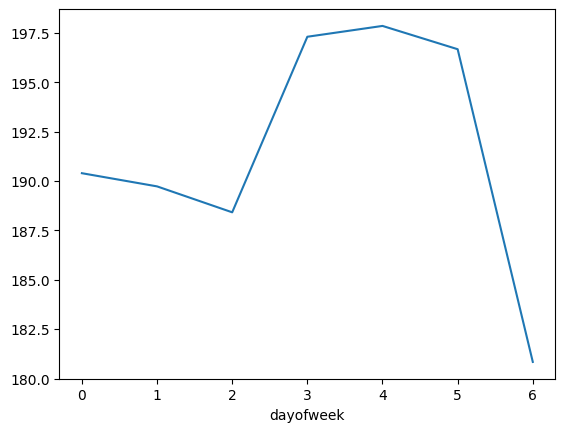

In [128]:
df.groupby(['dayofweek'])['count'].mean().plot()

In [129]:
df.groupby(['dayofweek'])['count'].sum()

dayofweek
0    295296
1    291985
2    292226
3    306401
4    302504
5    311518
6    285546
Name: count, dtype: int64

<Axes: xlabel='dayofweek'>

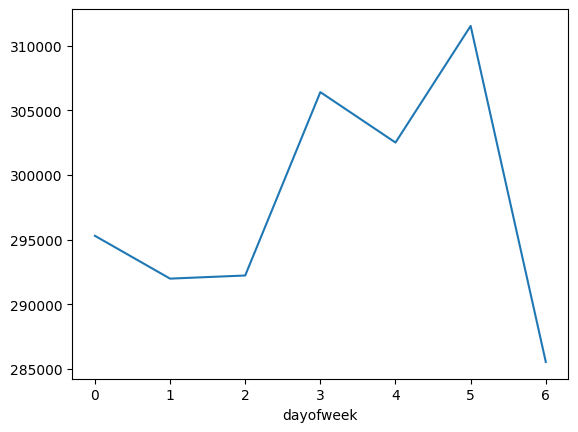

In [130]:
df.groupby(['dayofweek'])['count'].sum().plot()

- 4(금요일)이 평균값으로 봤을때보다 합으로 봤을때 적은 것을 볼 수 있음
- 금요일에 휴일이 많았나? 라고 생각해볼 수 있다.